# Assignment 6 Machine Learning

<div class="alert alert-success">There are 6 problems worth 5 points each in this assignment. You are expected to complete and submit your own work.
<br>
<ul>
<li>To submit your work, click on the <samp><b>Submit</b></samp> button on the top right navigation pane. Confirm that you want to submit by clicking <samp><b>Yes</b></samp> on the pop-up. </li>
<br>
<li>You can verify the status of the submission by clicking the <samp><b>Details</b></samp> button on the top right navigation pane.</li>
<br>
<li>You can also see grade details by clicking on the <samp><b>Grades</b></samp> button once the grade is released.</li>
</ul>
</div>

## Supervised Learning

In this section of the assignment, you have been given a task to predict whether a patient is likely to have a heart condition or not by training a classification tree model. You will use a dataset that was initially collected for medical research. It has been filtered and modified for our purposes. The dataset consists of 299 instances and 4 features that describe a patient's age, resting blood pressure (restingBP), cholesterol, and resting heart rate (restingHR). The target/dependent variable is named `heartDisease` that holds the values of **Yes** and **No**. The dataset is available at https://www3.nd.edu/~xduan/data-sets/heart.csv.

### Problem 1
Write a Python program to complete the following data exploration and preparation tasks:
+ Create a new DataFrame named `heart` by importing the data located at https://www3.nd.edu/~xduan/data-sets/heart.csv. Ouput the last 5 rows of `heart`.
+ Output a summary statistics for **all** of the columns in `heart`.
+ Create 4 sets of violin plots that compare the distrubtions of `age`, `restingBP`, `cholesterol`, and `restingHR` between the patients who has a heart condition (i.e., `heartDiease` value is **Yes**) and those who does not (i.e., `heartDiease` value is **No**).
+ Create a Series named `y` from the values in the `heartDisease` column of `heart`. If `heartDisease` is **Yes**, `y` should be **1**. Otherwise, `y` should **0**.
+ Create a DataFrame named `X` that includes the `age`, `restingBP`, `cholesterol`, and `restingHR` columns in `heart`.
+ Use a stratified random sampling approach to split `X` and `y` into training and test sets using a 8:2 split ratio. Set the random initialization seed to any positive integer.

In [13]:
###
### YOUR CODE HERE
###
import pandas as pd 
heart=pd.read_csv("https://www3.nd.edu/~xduan/data-sets/heart.csv")
display(heart.tail(5))

,age,restingBP,cholesterol,restingHR,heartDisease
294,68,144.0,193.0,141.0,Yes
295,57,130.0,131.0,115.0,Yes
296,57,130.0,236.0,174.0,Yes
297,56,120.0,100.0,120.0,Yes
298,47,150.0,226.0,98.0,Yes


In [14]:
heart.describe(include="all")

,age,restingBP,cholesterol,restingHR,heartDisease
count,299.000000,299.000000,299.000000,299.000000,299
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,160
mean,54.521739,131.715719,246.785953,149.327759,NaN
std,9.030264,17.747751,52.532582,23.121062,NaN
min,29.000000,94.000000,100.000000,71.000000,NaN
25%,48.000000,120.000000,211.000000,132.500000,NaN
50%,56.000000,130.000000,242.000000,152.000000,NaN
75%,61.000000,140.000000,275.500000,165.500000,NaN


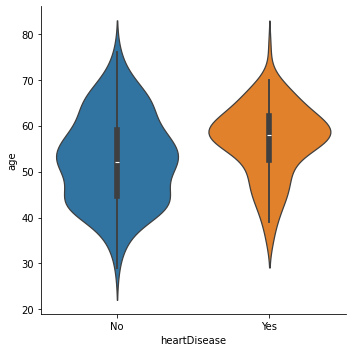

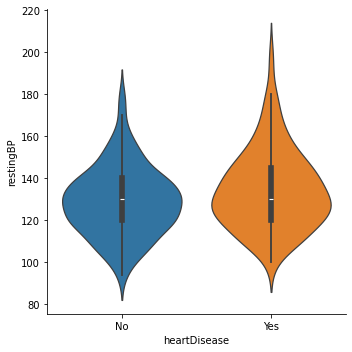

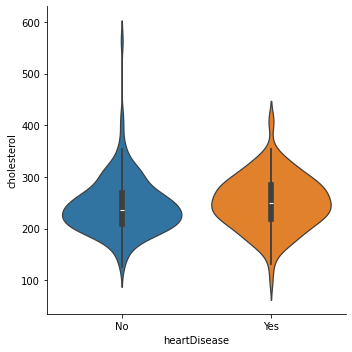

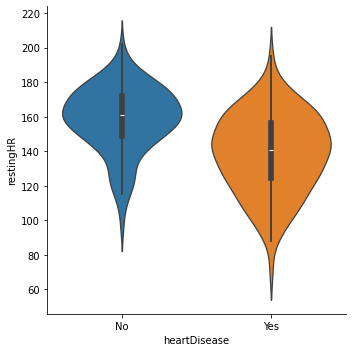

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
for h in heart.drop(columns="heartDisease").columns :
    sns.catplot(data=heart,
               x="heartDisease",
               y=h,
               hue="heartDisease", 
               kind="violin")
    plt.show()

In [16]:
y=heart["heartDisease"].apply(lambda d: 1 if d == "Yes" else 0)
y

0      0
1      1
2      1
3      0
4      0
      ..
294    1
295    1
296    1
297    1
298    1
Name: heartDisease, Length: 299, dtype: int64

In [17]:
X=heart.drop(columns="heartDisease")
X

,age,restingBP,cholesterol,restingHR
0,63,145.0,233.0,150.0
1,67,160.0,286.0,108.0
2,67,120.0,229.0,129.0
3,37,130.0,250.0,187.0
4,41,130.0,204.0,172.0
...,...,...,...,...
294,68,144.0,193.0,141.0
295,57,130.0,131.0,115.0
296,57,130.0,236.0,174.0
297,56,120.0,100.0,120.0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    stratify=y, 
                                                    random_state=42 
                                                   )
train_perc = len(X_train) / len(X)
test_perc = len(X_test) / len(X)
print(f"Training set ratio: {train_perc:.1f}; Testing set ratio: {test_perc:.1f}")

Training set ratio: 0.8; Testing set ratio: 0.2


### Problem 2
Write a Python program to complete the following model training and evaluation tasks:
+ Create a `DecisionTreeClassifier` model with the default settings except for setting the random initialization seed to any positive integer.  
+ Train the `DecisionTreeClassifier` model with the training set and evaluate its performance on the test set by comupting the accuracy, F1, and AUC scores. Output a message stating your result.

In [26]:
###
### YOUR CODE HERE
###
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
cl_models = {'LogisticRegression': LogisticRegression(),
            'SVC': SVC(random_state=42),
            'DecisionTree':DecisionTreeClassifier(random_state=42),
            'RandomForestClassifier': RandomForestClassifier(random_state=42),
            'KNeighborsClassifier(k=5)': KNeighborsClassifier()}

In [27]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
dtc=DecisionTreeClassifier()
score_dict= {}
for name, model in cl_models.items() :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    score_dict[name] = [accuracy, f1, auc]
score_df = pd.DataFrame(score_dict, index=['Accuracy', 'F1', 'AUC'])
score_df

,LogisticRegression,SVC,DecisionTree,RandomForestClassifier,KNeighborsClassifier(k=5)
Accuracy,0.783333,0.733333,0.566667,0.700000,0.666667
F1,0.745098,0.652174,0.566667,0.666667,0.615385
AUC,0.776786,0.720982,0.569196,0.696429,0.660714


In [28]:
my_accuracy_score=score_df.loc["Accuracy","DecisionTree"]
my_f1_score=score_df.loc["F1","DecisionTree"]
my_AUC_score=score_df.loc["AUC","DecisionTree"]
print(f"The accuracy score is {my_accuracy_score}; The F1 score is {my_f1_score}; The AUC score is {my_AUC_score}")

The accuracy score is 0.5666666666666667; The F1 score is 0.5666666666666667; The AUC score is 0.5691964285714286


### Problem 3

Write a Python program to complete the following hyperparameter tunning tasks:

+ Create a GridSearchCV object to fine tune the parameters of the `DecisionTreeClassifier` model you trained in the previous problem. During the grid search process, experiment:

    * `max_depth` with any integers between 2 and 9 (inclusive).

    * `min_samples_split` with any integers between 2 and 7 (inclusive).

    * `min_samples_leaf` with any integers between 4 and 11 (inclusive).
+ Determine the best model and evaluate its performance on the test set by comupting the accuracy, F1, and AUC scores. Output a message stating your result.

In [29]:
###
### YOUR CODE HERE
###
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid = {'max_depth': range(2, 10), 
        'min_samples_split': range(2, 8), 
        'min_samples_leaf': range(4, 12)}
gc = GridSearchCV(estimator=dtc,
                  param_grid=grid,
                  scoring='accuracy') 
gc.fit(X_train, y_train)
best_params = gc.best_params_
print(f'Best settings: {best_params}')
best_dtc = gc.best_estimator_
new_y_pred = best_dtc.predict(X_test)
new_accuracy = accuracy_score(y_test, new_y_pred)
new_f1 = f1_score(y_test, new_y_pred)
new_auc = roc_auc_score(y_test, new_y_pred)
print(f'After fine-tuning, accuracy:{new_accuracy}, F1:{new_f1}, ROC_AUC: {new_auc}.')

Best settings: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
After fine-tuning, accuracy:0.8, F1:0.7692307692307692, ROC_AUC: 0.7946428571428571.


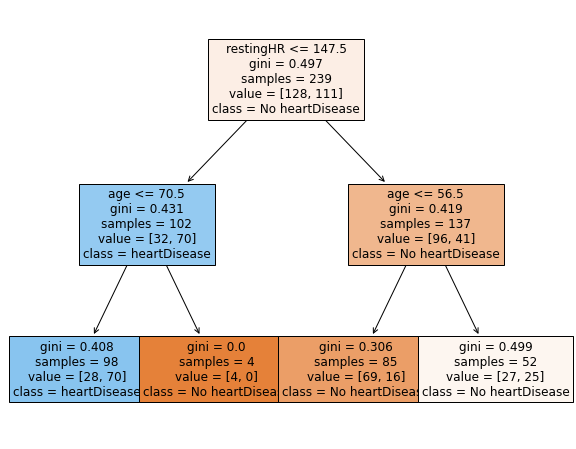

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree=best_dtc, 
          feature_names=X.columns, 
          class_names=["No heartDisease", "heartDisease"], 
          filled=True, 
          fontsize=12 
         )

plt.show()

## Unsupervised Learning

In this section of the assignment, you have been given a task to segment the colleges in your home or favorite state using K-Means clustering. You will use a dataset containing information about a large number of colleges in the United States. It came from the U.S. Department of Education and has been filtered and modified for our purposes. The dataset consists of 1,270 instances and 17 features that describe the name, city, state, admission rate, sat average and other characterictics of each college and is available at https://www3.nd.edu/~xduan/data-sets/colleges.csv.

### Problem 4
Write a Python program to complete the following data exploration and visualization tasks:
+ Create a new DataFrame named `colleges` by importing the <samp><b>name</b></samp>, <samp><b>state</b></samp>, <samp><b>control</b></samp>, <samp><b>admission_rate</b></samp>, <samp><b>sat_avg</b></samp>, <samp><b>tuition</b></samp>, and <samp><b>faculty_salary_avg</b></samp> columns in the CSV file located at <a href="https://www3.nd.edu/~xduan/data-sets/colleges.csv">https://www3.nd.edu/~xduan/data-sets/colleges.csv</a>. Set the **`name`** column as the row index and display the first 3 rows of `colleges`.
+ From `colleges`, create a new DataFrame named `my_state_colleges` that contains only the colleges in your home or favorite state. Display any random 5 rows of `my_state_colleges`.
+ Create a pair plot to visualize the pair-wise relationship between the numeric columns in `my_state_colleges`. Set the color of the plot to denote the value in the `control` column.
+ Use a lambda function to performe z-score normalization to the `admission_rate` and `tuition` columns in `my_state_colleges`. Assign the result to a new DataFrame named `colleges_scaled`.
+ Generate a summary statistics for `colleges_scaled` to check if your normalization is successful.

In [31]:
###
### YOUR CODE HERE
###
colleges=pd.read_csv("https://www3.nd.edu/~xduan/data-sets/colleges.csv", 
                     usecols=("name", "state", "control", "admission_rate", "sat_avg", "tuition", "faculty_salary_avg"))
colleges=colleges.set_index("name")
display(colleges.head(3))

,state,control,admission_rate,sat_avg,tuition,faculty_salary_avg
name,,,,,,
Alaska Pacific University,AK,Private,0.4207,1054,19610,5804
Marion Military Institute,AL,Public,0.6139,1055,8778,5916
Auburn University at Montgomery,AL,Public,0.8017,1009,9080,7255


In [32]:
tx_mask=colleges["state"].isin(["TX"])
my_state_colleges=colleges[tx_mask]
display(my_state_colleges.sample(5))

,state,control,admission_rate,sat_avg,tuition,faculty_salary_avg
name,,,,,,
Hardin-Simmons University,TX,Private,0.5680,1037,22350,6579
Texas Southern University,TX,Public,0.5192,812,8126,7225
Dallas Christian College,TX,Private,0.3796,996,15492,4159
Texas Lutheran University,TX,Private,0.5587,1020,26800,6727
Houston Baptist University,TX,Private,0.3573,1054,28800,6377


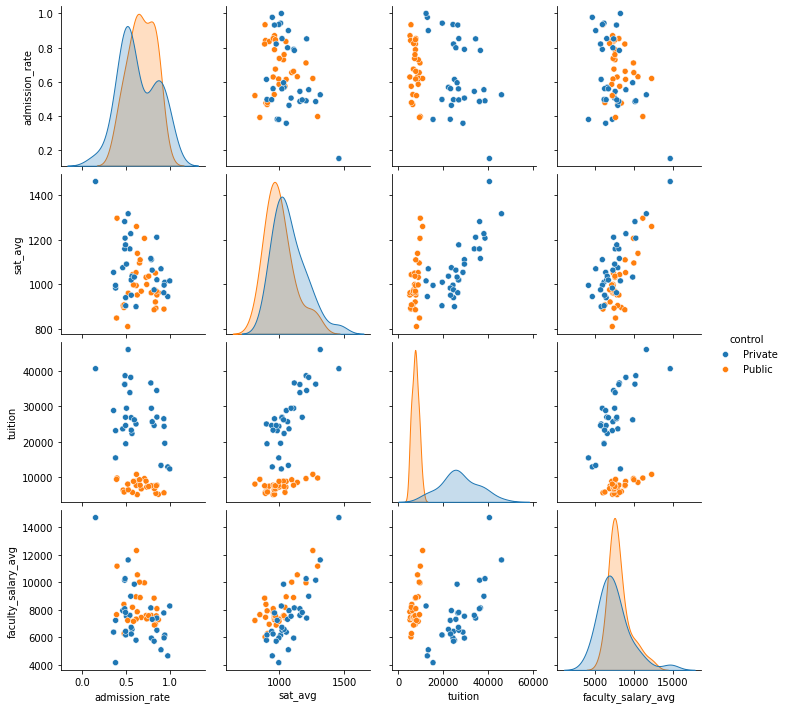

In [33]:
sns.pairplot(data=my_state_colleges, 
             hue="control"  
            )
plt.show()

In [34]:
colleges_scaled=my_state_colleges[["admission_rate","tuition"]].apply(lambda v: (v-v.mean())/v.std())
display(colleges_scaled)

,admission_rate,tuition
name,,
Rice University,-2.694558,1.994265
The University of Texas Rio Grande Valley,-0.137151,-1.073031
Texas A & M University-Texarkana,-0.954771,-0.996247
The University of Texas of the Permian Basin,1.160318,-1.066358
Texas A & M International University,-1.000343,-0.962102
...,...,...
Dallas Christian College,-1.468933,-0.178746
LeTourneau University,-0.855584,0.810782
Prairie View A & M University,-1.406204,-0.701417


In [35]:
colleges_scaled.describe()

,admission_rate,tuition
count,6.300000e+01,6.300000e+01
mean,6.308886e-16,3.436405e-17
std,1.000000e+00,1.000000e+00
min,-2.694558e+00,-1.073031e+00
25%,-8.201984e-01,-8.581483e-01
50%,-1.832592e-01,-4.475779e-01
75%,9.072580e-01,7.612105e-01
max,1.857305e+00,2.459997e+00


### Problem 5

Write a Python program to determine the optimal number of clusters to segment the colleges in `colleges_scaled` by completing the following tasks:
+ Segment the colleges in `colleges_scaled` into `k` clusters with `k` ranging from **2** to **8** (inclusive). Calculate the Within-Cluster Sum of Square (WCSS) and average silhouette score for each `k`. Store the results in a 7 by 2 DataFrame named `scores_df` which contains two columns with one being the WCSS and the other being the average silhouette score. The row index of `scores_df` should be the integers ranging from **2** and **8**. (inclusive).
+ Create two line-plots that are stacked virtically to visualize the WCSS and average silhouette scores for each `k` ranging from **2** and **8** (inclusive).

**Note:**: Set the number of times the KMeans model should run with different centroid seeds to **5** and set the random initialization seed to any positive integer.

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss_list = []
silhouette_list = list()
for k in range(2, 9):
    km = KMeans(n_clusters=k, 
                n_init=5, 
                random_state=42) 
    km.fit(colleges_scaled)
    wcss = km.inertia_
    silhouette = silhouette_score(colleges_scaled, km.labels_) 
    wcss_list.append(wcss)
    silhouette_list.append(silhouette)
scores_dict = {'wcss': wcss_list,
         'silhouette': silhouette_list}
scores_df = pd.DataFrame(scores_dict, index=range(2, 9))
scores_df

,wcss,silhouette
2,66.479542,0.432651
3,40.291719,0.433008
4,24.930464,0.503915
5,18.355698,0.501214
6,14.138271,0.499778
7,10.878802,0.506544
8,8.722506,0.505673


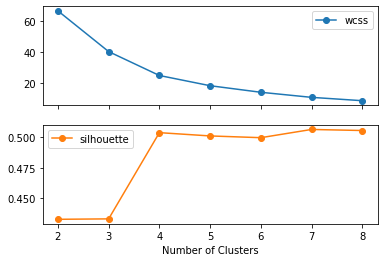

In [37]:
scores_df.plot(subplots = True, marker = 'o')
plt.xlabel('Number of Clusters')
plt.show()

### Porblem 6

Write a Python program to segment the colleges in `colleges_scaled` using the optimal `k` and evaluate the result by completing the following tasks:
+ Use the optimal `k` you determined in the previous problem to segment the colleges in `colleges_scaled` and visualize the resulting clusters in a scatter plot. Make the plot 10 inches wide and 8 inches high.
+ Create a new DataFrame named `labeled_colleges` by copying `my_state_colleges`. Assign the cluster label to each college in `labeled_colleges` by adding a new column named `cluster` which contains the cluster assignment. Display the first 5 rows of `labeled_colleges`.
+ Dummy code the `control` column in `labeled_colleges` and name the resulting columns `control_Private` and `control_Public`.  Display the first 5 rows of `labeled_colleges`.
+ Calculate the average **admission_rate**, **sat_avg**, **tuition**, **faculty_salary_avg**, **control_Private** and **control_Public** for colleges in `labeled_colleges` grouped by `cluster`.
+ Add a Markdown cell to share any insights you derived about the colleges in your chosen state based on the clustering results.

**Note**:Set the number of times the k-means algorithm should run with different centroid seeds to **5** and set the random initialization seed to any positive integer.

In [38]:
###
### YOUR CODE HERE
###
km = KMeans(n_clusters = 5, n_init = 5, random_state = 42)
km.fit(colleges_scaled)
cluster_labels = km.labels_ 
centroids = km.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = colleges_scaled.columns)
centroids_df

,admission_rate,tuition
0,-0.505166,-0.847185
1,-1.029831,1.813979
2,1.087998,0.867499
3,0.993861,-0.802161
4,-0.837767,0.579503


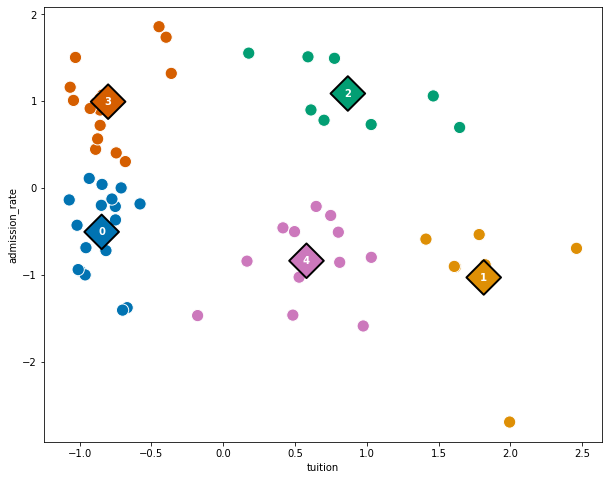

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=colleges_scaled,
        x="tuition", 
        y="admission_rate", 
        hue=cluster_labels, 
        palette='colorblind', 
        s=150,   
        legend=False 
           )
sns.scatterplot(data=centroids_df,  
               x="tuition",
               y="admission_rate", 
               hue=centroids_df.index,
               palette='colorblind',
               s=600, 
               marker='D',
               ec='black', 
               legend=False
               )
for i in centroids_df.index:
    plt.text(x=centroids_df.loc[i, "tuition"], 
             y=centroids_df.loc[i, "admission_rate"],
             s=i, 
             color='white',
             weight='bold', 
             horizontalalignment='center',
             verticalalignment='center')

In [40]:
labeled_colleges=my_state_colleges.copy()
labeled_colleges["cluster"]=cluster_labels
display(labeled_colleges.head(5))

,state,control,admission_rate,sat_avg,tuition,faculty_salary_avg,cluster
name,,,,,,,
Rice University,TX,Private,0.1510,1460,40566,14702,1
The University of Texas Rio Grande Valley,TX,Public,0.6280,953,5173,7856,0
Texas A & M University-Texarkana,TX,Public,0.4755,897,6059,8395,0
The University of Texas of the Permian Basin,TX,Public,0.8700,963,5250,7275,3
Texas A & M International University,TX,Public,0.4670,906,6453,7925,0


In [41]:
labeled_colleges=pd.get_dummies(labeled_colleges,
                               columns=["control"])
display(labeled_colleges.head(5))

,state,admission_rate,sat_avg,tuition,faculty_salary_avg,cluster,control_Private,control_Public
name,,,,,,,,
Rice University,TX,0.1510,1460,40566,14702,1,1,0
The University of Texas Rio Grande Valley,TX,0.6280,953,5173,7856,0,0,1
Texas A & M University-Texarkana,TX,0.4755,897,6059,8395,0,0,1
The University of Texas of the Permian Basin,TX,0.8700,963,5250,7275,3,0,1
Texas A & M International University,TX,0.4670,906,6453,7925,0,0,1


In [42]:
cluster_stats=labeled_colleges.groupby("cluster")[["admission_rate","sat_avg","tuition","faculty_salary_avg"]].mean()
display(cluster_stats)

,admission_rate,sat_avg,tuition,faculty_salary_avg
cluster,,,,
0,0.559359,1014.588235,7779.000000,8514.000000
1,0.461500,1258.428571,38485.714286,10201.000000
2,0.856511,1052.111111,27564.444444,6768.444444
3,0.838953,986.823529,8298.529412,7325.176471
4,0.497323,1012.769231,24241.307692,6835.769231


The colleges in Texas have a loose trend of having lower admission rates as tution goes up. But is also appears that their are more affordable colleges than expensive ones.